<a href="https://colab.research.google.com/github/EdisonMoreira/-aquecimento-formacao-infra/blob/master/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Escritório de Dados</font>

## Aquecimento para Formação de Infraestrutura
## Edison Moreira
### Iplanrio / Diretoria de Sistemas (DSI) / Gerência de Arquitetura e Integrações (GAI)

## Pipeline
### Etapa 1: Entendendo os dados 🎲

- **Objetivo:** nessa etapa, você deve somente ingerir dados da API do `randomuser.me` e observar o formato dos dados, tentando imaginar como eles poderiam ser usados para construir uma tabela.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para consumir a API na URL `https://randomuser.me/api/` e retornar um dicionário com os dados.

## Instalando e Carregando Pacotes

In [120]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [121]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
# Import da package para tratamento de acesso a uma API
import requests

## Ingerindo os Dados

Acessando os dados na API Random User

Confirmando o sucesso do acesso que é 
API Status Code 200: Everything went okay, 
and the result has been returned (if any).

In [ ]:
response = requests.get("https://randomuser.me/api/")
print(response.status_code)

200


Exibindo o conteúdo do response que tem o formato json,
sendo a formatação de dictionary

In [123]:
response.json()

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Harley', 'last': 'Thomas'},
   'location': {'street': {'number': 7342, 'name': 'Kilmore Street'},
    'city': 'Wellington',
    'state': 'Gisborne',
    'country': 'New Zealand',
    'postcode': 53173,
    'coordinates': {'latitude': '49.1222', 'longitude': '-149.1682'},
    'timezone': {'offset': '+3:30', 'description': 'Tehran'}},
   'email': 'harley.thomas@example.com',
   'login': {'uuid': '6b9b6e37-fc68-4b81-ae3e-2e5b7512e2e0',
    'username': 'browntiger234',
    'password': 'tracy',
    'salt': '7VxGTIf4',
    'md5': '723ac271a2b9a8f727a8385e7595ddd4',
    'sha1': 'f1e5054a05aeb9ef451fa52a5c380ed8ad9fb056',
    'sha256': '64b0f378274ffb89faf91fd78d21c07fd38d2e8b6040497f6000ccfb942696ad'},
   'dob': {'date': '1996-04-29T07:33:06.497Z', 'age': 26},
   'registered': {'date': '2009-07-23T17:13:51.048Z', 'age': 13},
   'phone': '(431)-181-9048',
   'cell': '(392)-231-9840',
   'id': {'name': '', 'value': None},
   '

### Etapa 2: Coletando dados 💾

- **Objetivo:** nessa etapa, você deve coletar dados da API e armazená-los em um arquivo CSV.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para coletar uma quantidade `n` de dados da API (sendo `n` um valor fornecido via parâmetro da função), manipulá-los para montar um `pandas.DataFrame` e salvar o resultado em um arquivo CSV.
**Dicas:**
  - Para tornar os dados mais fáceis de manipular no futuro, faça com que o `DataFrame` seja "plano", ou seja, cada coluna seja um único atributo do objeto.
  - Para ter dados suficientes para uma análise razoável nas próximas etapas, recomendamos `n>=500`.

> Criar função qu receba parametro Args1 para fazer Args1 acessos a API
Juntando cada leitura (append) ao dicitionario

In [124]:
# Import da packages
# para tratamento de acesso a uma API
# para criação e processamento de Pandas Dataframe
import pandas as pd
pd.set_option("display.max.columns", None)




In [162]:
# Função para coletar uma quantidade n de dados da API (sendo n um valor fornecido via parâmetro da função),
def coletaDado (quantidadeDado: int):
    parametroAPI="https://randomuser.me/api/?results=" + str(quantidadeDado)
    print(parametroAPI)
    return requests.get(parametroAPI)

In [163]:
responseDados = coletaDado(135)
print(responseDados.status_code)

https://randomuser.me/api/?results=135
200


In [164]:
responseDict=responseDados.json()

In [165]:
# Use json_normalize() to convert JSON (dict, list of dicts) to DataFrame Plano, cada campo uma coluna
import json
from pandas import json_normalize
df = json_normalize(responseDict['results']) 

In [166]:
pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
import phonenumbers

In [168]:
# Padrão E.164 formato Internacional
# Phones que contem letras são desprezados
# A Python program to demonstrate working of re.match().
import re
 
# Lets use a regular expression to dismatch a phone string
# within alphabet characters
regex = r"([0-9 -()]+)"


for ind in df.index:
    match = re.search(regex, df['phone'][ind])
    if match is True:
      phoneIntAux = phonenumbers.parse(df['phone'][ind], df['nat'][ind])
      phoneInt = phonenumbers.format_number(phoneIntAux, phonenumbers.PhoneNumberFormat.INTERNATIONAL)
      df.loc[ind, 'phone']  = phoneInt    

In [169]:
# Padrão E.164 formato Internacional
# Celulares que contem letras são desprezados
# A Python program to demonstrate working of re.match().

for ind in df.index:
   match = re.search(regex, df['cell'][ind])
   if match == None:
     cellIntAux = phonenumbers.parse(df['cell'][ind], df['nat'][ind])
     cellInt = phonenumbers.format_number(phoneIntAux, phonenumbers.PhoneNumberFormat.INTERNATIONAL)
     df.loc[ind, 'cell']  = cellInt
   else:
    print(df['cell'][ind], df['nat'][ind])  

081-961-2946 IE
43350743 NO
06-87-49-15-13 FR
064-0412-329 RS
669-105-778 ES
(208) 745-9684 US
(694) 671 8842 MX
9922649413 IN
0934-055-1174 IR
682-309-391 ES
7798812571 IN
0477-152-823 AU
(671) 502 1313 MX
(09) 4351-4776 BR
(066) S56-3716 UA
(79) 7281-7199 BR
0177-9535722 DE
19878763 DK
(06) 01009312 NL
694-976-745 ES
(044)-039-2073 TR
076 051 75 51 CH
(684) 536 2417 MX
61822800 DK
(888)-696-5253 TR
(276)-296-4571 TR
06-55-97-51-45 FR
Y92 G13-2443 CA
(508)-776-1267 NZ
079 344 71 34 CH
(098) P15-3095 UA
(48) 2936-8894 BR
(58) 1749-4700 BR
040-583-94-92 FI
(52) 8473-4653 BR
(06) 99790549 NL
7375301422 IN
043-172-36-25 FI
(06) 75355851 NL
0422-594-777 AU
0951-056-0008 IR
(607)-745-3297 TR
06-70-69-46-90 FR
07078 196647 GB
42129794 NO
07356 793501 GB
07260 000833 GB
0968-312-8667 IR
081-088-0142 IE
(659) 570 4738 MX
(328) 404-9253 US
97339400 NO
0496-557-962 AU
06-20-87-38-28 FR
062-8384-462 RS
049-552-77-84 FI
0463-183-449 AU
9053014289 IN
(715) 470-5491 US
081-878-8577 IE
(43) 1152-0814

### Etapa 4: Analisando dados sem agrupamento 📊

- **Objetivo**: com seus dados devidamente tratados, você deve gerar os seguintes itens:
  - Um relatório em texto (não precisa de formatação) contendo:
    - A porcentagem dos usuários por gênero
    - A porcentagem dos usuários por país
  - Uma imagem contendo um gráfico de distribuição da idade dos usuários (a biblioteca utilizada para o `plot` pode ser qualquer uma).
- **Descrição da solução**: uma função que recebe, como parâmetro, um `pandas.DataFrame` e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

In [170]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

### A porcentagem dos usuários por gênero

In [171]:
print(df["gender"].unique())
print(type(df["gender"].unique()))

['male' 'female']
<class 'numpy.ndarray'>


In [172]:
df['gender'].value_counts()

female    74
male      61
Name: gender, dtype: int64

In [173]:
dfSexos=pd.DataFrame(df['gender'].value_counts())

In [174]:
# Lista auxiliar Sexo
# para alterar o label da coluna gender
sexosLista = dfSexos.columns.tolist()
sexosLista[sexosLista.index('gender')] = 'usuarios'
dfSexos.columns = sexosLista

In [175]:
# Vamos calcular o percentual para cada genero
dfSexos['percentual'] = (dfSexos['usuarios'] / dfSexos['usuarios'].sum()) * 100

In [190]:
#Relatório básico 
display(dfSexos)

,usuarios,percentual
female,74,54.814815
male,61,45.185185


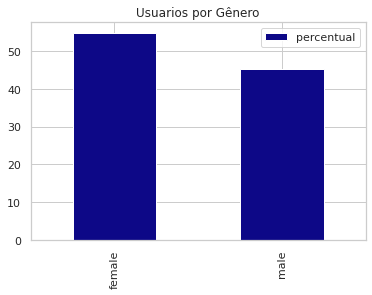

In [177]:
#Gráfico básico
dfSexos.plot(kind='bar',y='percentual', title = 'Usuarios por Gênero', colormap = 'plasma');

### A porcentagem dos usuários por país

Import da package para acesso e tratamento dos países (Country)

In [178]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

In [179]:
# Listas auxiliares Paises
import pycountry
nomes_paises = []

In [180]:
df.head(3)

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,male,juan.otoole@example.com,051-265-4842,081-961-2946,IE,Mr,Juan,Otoole,3606,Novara Avenue,Ardee,Laois,Ireland,14034,-2.5585,-81.7806,-1:00,"Azores, Cape Verde Islands",8b658070-9c3c-429e-b61d-f3ae94a87d64,beautifulswan963,hallie,JVoWkJ39,c85c9d31e4a63a53fa7846e9b82f0dbe,1e62e5abe41de80d6352291440af2fcba3e16702,3fd2fa9b33d072dec82701af949078bda24f2df0b7ffbf...,1956-01-22T13:24:37.805Z,67,2015-06-19T10:32:01.280Z,7,PPS,5733542T,https://randomuser.me/api/portraits/men/91.jpg,https://randomuser.me/api/portraits/med/men/91...,https://randomuser.me/api/portraits/thumb/men/...
1,male,ayman.tveitan@example.com,65343765,43350743,NO,Mr,Ayman,Tveitan,5159,Eindrides vei,Ålesund,Bergen,Norway,2003,83.6119,54.3115,+10:00,"Eastern Australia, Guam, Vladivostok",14f6b8c5-5963-4c61-af82-f1547fe782fa,goldendog635,panther1,qE03CGl0,9d76f8244b93d88937d008a6ad895e5b,e8a826fdd645c973e30907f70adad8d66b1c03e9,07ed5a9d17e5e7cb30dcfaae53d2161b1cb43c9fe32299...,1949-11-25T18:06:25.394Z,73,2011-10-23T09:45:51.207Z,11,FN,25114945741,https://randomuser.me/api/portraits/men/86.jpg,https://randomuser.me/api/portraits/med/men/86...,https://randomuser.me/api/portraits/thumb/men/...
2,female,norah.dumont@example.com,02-62-32-28-36,06-87-49-15-13,FR,Miss,Norah,Dumont,272,Rue Courbet,Courbevoie,Maine-et-Loire,France,96685,-28.7149,-117.9246,-12:00,"Eniwetok, Kwajalein",917d8857-5ba9-4565-91c7-6c51369d3000,bigrabbit783,isaac,6YyhWtga,ce7167f166a7fcffea837d3037576114,ccbca11d9eacf71776ac312e4643836faa263289,8cb5beb40a8ba050815cf9d93bd4843890abc1da363edf...,1993-09-03T00:02:17.413Z,29,2008-04-16T07:36:07.234Z,14,INSEE,2930831697226 76,https://randomuser.me/api/portraits/women/95.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...


In [181]:
# Loop para obter o país de acordo com a região
#tratar a contagem desagrupada
for i in range(df.shape[0]):
    try:
        pais = df['nat'].values[i]
        paisDescricao=pycountry.countries.get(alpha_2=pais).name
        nomes_paises.append(paisDescricao)
    except:
        continue

In [194]:
# Prepara e exibe um dictonary com a contagem de usuarios por pais
from collections import Counter
dict_usuario_pais = dict(Counter(nomes_paises))
display(dict_usuario_pais)


{'Ireland': 8,
 'Norway': 6,
 'France': 6,
 'Serbia': 3,
 'Spain': 7,
 'United States': 11,
 'Mexico': 8,
 'India': 9,
 'Iran, Islamic Republic of': 5,
 'Australia': 6,
 'Brazil': 11,
 'Ukraine': 9,
 'Germany': 5,
 'Denmark': 5,
 'Netherlands': 3,
 'Turkey': 7,
 'Switzerland': 6,
 'Canada': 6,
 'New Zealand': 4,
 'Finland': 4,
 'United Kingdom': 6}

In [158]:
type(dict_usuario_pais)

dict

In [184]:
# Transform dictonary into a new dataframe
df_usuarios_pais=pd.DataFrame.from_dict(dict_usuario_pais, orient='index', columns=['Usuarios'])


In [185]:
#Relatório básico
df_usuarios_pais.head()

,Usuarios
Ireland,8
Norway,6
France,6
Serbia,3
Spain,7


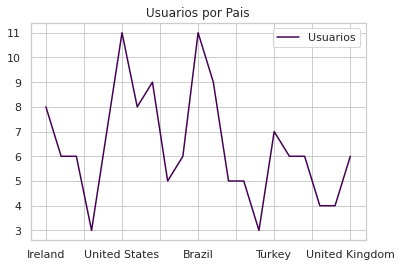

In [189]:
#Gráfico básico, sem exibição do nome de todos os paises que tem usuários
df_usuarios_pais.plot(y='Usuarios', title = 'Usuarios por Pais', colormap = 'viridis');

In [70]:
# Lista auxiliar Paises
# para alterar o label da coluna paises
df_usuario_pais.rename( columns={'Unnamed: 0':'pais',1 :'usuarios'}, inplace=True)

#paisesLista = df_usuarios_paises.columns.tolist()
#paisesLista[paisesLista.index('paises')] = 'usuarios'
#df_usuarios_paises.columns = paisesLista

AttributeError: ignored

In [ ]:
# Visualiza
display(df_usuario_pais)

,usuarios
Germany,15
"Iran, Islamic Republic of",15
United Kingdom,12
Switzerland,12
Netherlands,12
Spain,11
Ireland,10
India,10
Brazil,9
Serbia,9


KeyError: ignored

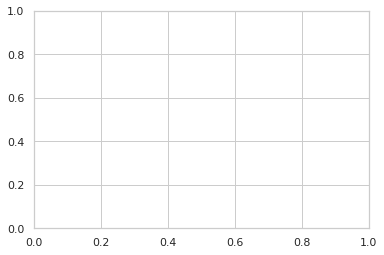

In [ ]:
import matplotlib.pyplot as plt
xy = plt.subplots()
df_usuarios_paises.plot(x='paises',y='usuarios',axis=1)

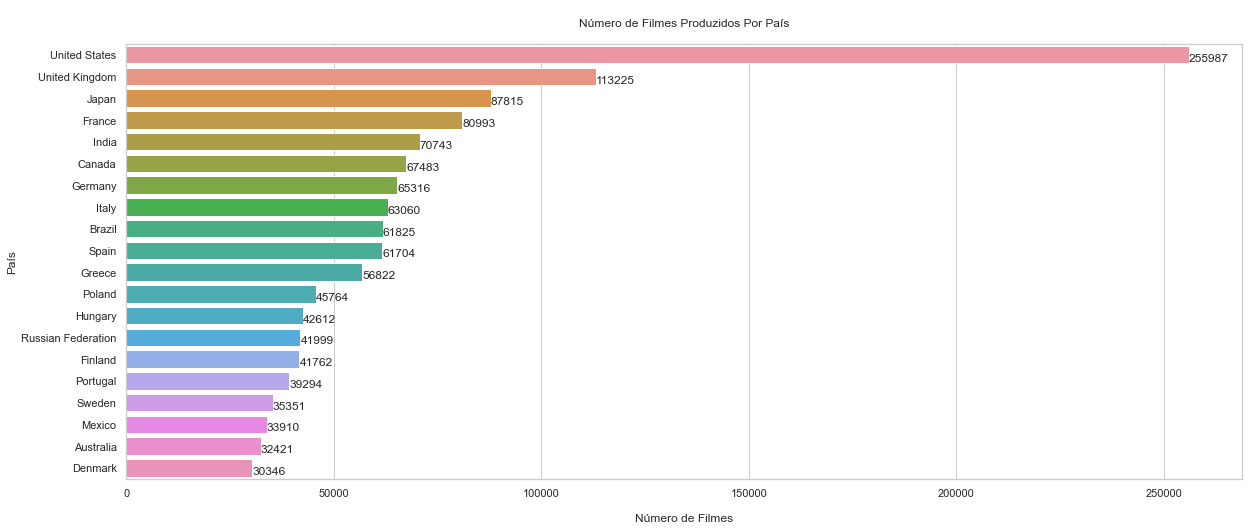

In [ ]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais São os Top 10 Melhores Filmes?

Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [ ]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

## 10- Quais São os Top 10 Piores Filmes?

Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>

Parabéns se você chegou até aqui. Use o voucher PYTHONDSA9642 para comprar qualquer curso ou Formação da DSA com 5% de desconto.